In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)


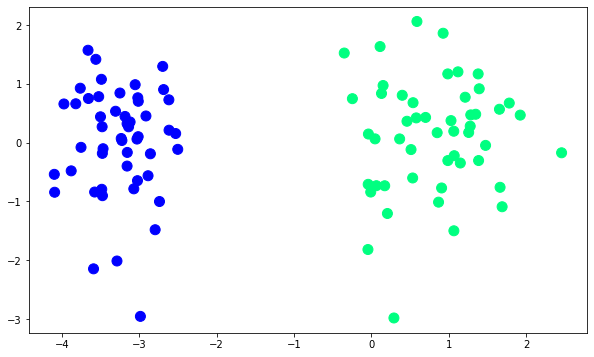

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter",s=100)

In [5]:
from sklearn.linear_model import LogisticRegression
import random
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(x,y)

E:\anakonda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='none', solver='sag')

In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [8]:
print(m1)
print(b1)

-22.063392346804648
[-26.48103289]


In [9]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [21]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        batch_size=int(x.shape[0]/10)
        for j in range(int(x.shape[0]/batch_size)):
            idx=random.sample(range(x.shape[0]),batch_size)
            y_hat = sigmoid(np.dot(X,weights))
            weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
coef_,intercept_ = gd(x,y)
print(coef_)
print(intercept_)

[6.52286898 0.3730028 ]
8.202821262556421


In [24]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

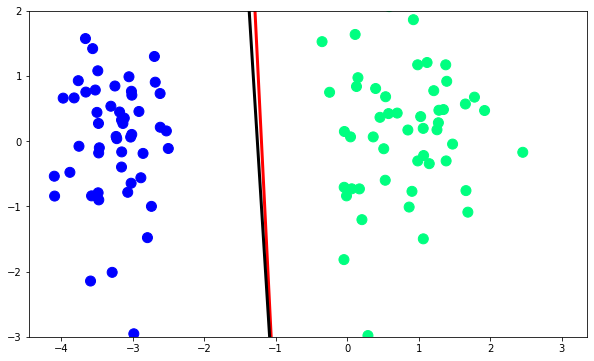

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)